# Homework 02 --- Session 3, Multilinear regression

## EX 1 Artificial data (25pt -- 5+5+5+10)
### Dataset 'H31.csv'
### Tasks:
Consider a multivariate regression of the output variable $y$ over the 3 regressors $x_1$, $x_2$, $x_3$ as follows.
* (a) Which one of the regressors serves as dummy variable corresponding to an intercept term?
    * Ignore the first column since it's just a duplicate index (You can avoid it by running **ex1 = pd.read_csv('H31.csv', index_col=0)** )
* (b) Calculate the coefficients $\hat w$ manually or with python *numpy* module by using matrix computation.
* (c) Verify your answer by implementing the OLS regression function with python *statsmodels* module.
* (d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%pylab inline

from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
ex1 = pd.read_csv('H31.csv', index_col=0)
ex1.head()

,y,x1,x2,x3
1,0,1,-2,1
2,2,-1,-1,1
3,2,0,0,1
4,3,-1,1,1
5,3,1,2,1


(a) Column 'x3' serves as the dummy variable corresponding to the intercept term in this case.

We have $\hat{w}=\left(X^T X\right )^{-1}X^T Y$, so we will define the matrices as follows:

In [3]:
X = np.matrix(ex1.loc[:,['x3','x1','x2']])
Y = np.matrix(ex1.y).T
w = (X.T * X).I * X.T * Y
print('(b)')
print(w)

(b)
[[ 2. ]
 [-0.5]
 [ 0.7]]


In [4]:
X1 = X[:,1:]
lm=smf.ols('Y~X1',data=ex1).fit()
print(lm.params)
print('\n(c) Yes, these do match our previous results. Hooray!')

Intercept    2.0
X1[0]       -0.5
X1[1]        0.7
dtype: float64

(c) Yes, these do match our previous results. Hooray!


(d)


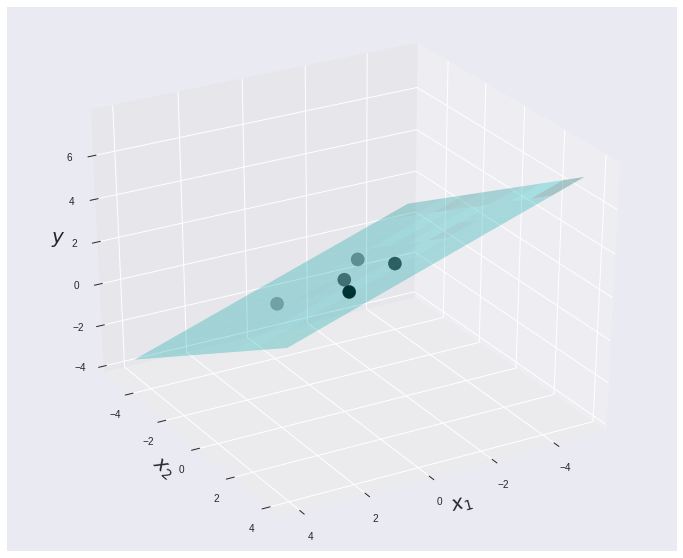

In [5]:
fig = plt.figure(figsize = (12,10))
ax = fig.gca(projection='3d')
ax.scatter(ex1.x1, ex1.x2, ex1.y, s = 175,  c = 'k')

radius = 5
x1, x2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = lm.params[0] + lm.params[1] * x1 + lm.params[2] * x2

ax.plot_surface(x1, x2, fit_y, color='c', alpha = 0.3)
ax.set_xlabel('$x_1$', fontsize = 20)
ax.set_ylabel('$x_2$', fontsize = 20)
ax.set_zlabel('$y$', fontsize = 20)

ax.view_init(azim = 60)
print('(d)')

## EX 2, Income vs Insurance coverage (35+10pt -- 10+10+5+10+10)
### Dataset 'IncomeInsReg.csv'
You are given the demographic data of insurance coverage in NYC, with the details:
* Zip code
* Per capita income
* Total population (for each zip code)
* Population with Insurance coverage
    * Population with Public Insurance coverage
    * Population with Private Insurance coverage
* Population with No Insurance coverage

### Tasks:
* (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information
* (b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
    * IncomePerCapita
    * Total Population
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with NO Insurance coverage
    * Population with BOTH types of Insurance coverage
* (c) Drop rows with NaN (if any) and convert all population counts into proportions (percentage of total population, with the form 58.3 instead of 0.583)
* (d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") to predict income -- What interesting results do we have here? Briefly state what you've obtained.
#### Extra credit:
* (e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

In [6]:
ex2 = pd.read_csv('IncomeInsReg.csv')
ex2.head()

,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage
0,10001,77512.0,22767,20809,5800,16795,1958
1,10002,26905.0,79490,70361,40139,35167,9129
2,10003,79088.0,56909,53135,8593,48522,3774
3,10004,98020.0,3024,2780,180,2705,244
4,10005,99633.0,7566,6996,122,6944,570


In [7]:
ex2['Both'] = ex2.Public + ex2.Private - ex2.WithCoverage #create column for people with both public and private insurance
print('(a)')
ex2.head()

(a)


,Zipcode,IncomePerCapita,TotalPop,WithCoverage,Public,Private,NoCoverage,Both
0,10001,77512.0,22767,20809,5800,16795,1958,1786
1,10002,26905.0,79490,70361,40139,35167,9129,4945
2,10003,79088.0,56909,53135,8593,48522,3774,3980
3,10004,98020.0,3024,2780,180,2705,244,105
4,10005,99633.0,7566,6996,122,6944,570,70


In [8]:
ex2 = ex2.drop(['WithCoverage'], axis=1)
ex2['Public'] = ex2.Public - ex2.Both
ex2['Private'] = ex2.Private - ex2.Both
print('(b)')
ex2.head()

(b)


,Zipcode,IncomePerCapita,TotalPop,Public,Private,NoCoverage,Both
0,10001,77512.0,22767,4014,15009,1958,1786
1,10002,26905.0,79490,35194,30222,9129,4945
2,10003,79088.0,56909,4613,44542,3774,3980
3,10004,98020.0,3024,75,2600,244,105
4,10005,99633.0,7566,52,6874,570,70


In [9]:
ex2 = ex2.dropna()
ex2['Public'] = np.round(ex2.Public / ex2.TotalPop, 3) * 100
ex2['Private'] = np.round(ex2.Private / ex2.TotalPop, 3) * 100
ex2['NoCoverage'] = np.round(ex2.NoCoverage / ex2.TotalPop, 3) * 100
ex2['Both'] = np.round(ex2.Both / ex2.TotalPop, 3) * 100
print('(c)')
ex2.head()

(c)


,Zipcode,IncomePerCapita,TotalPop,Public,Private,NoCoverage,Both
0,10001,77512.0,22767,17.6,65.9,8.6,7.8
1,10002,26905.0,79490,44.3,38.0,11.5,6.2
2,10003,79088.0,56909,8.1,78.3,6.6,7.0
3,10004,98020.0,3024,2.5,86.0,8.1,3.5
4,10005,99633.0,7566,0.7,90.9,7.5,0.9


In [10]:
X_insurance = np.matrix(ex2.loc[:,['Public','Private','Both']])
y_insurance = np.matrix(ex2.IncomePerCapita).T
lm1 = smf.ols('y_insurance ~ X_insurance-1',data=ex2).fit()
print(lm1.params)

X_insurance[0]   -452.546411
X_insurance[1]    946.012419
X_insurance[2]    355.174595
dtype: float64


(d) Given the results above, it appears that zip codes with high levels of private coverage have a significantly higher than average expected income, while zip codes with higher levels of public coverage have lower expected income have lower than average expected incomes. Interestingly, zip codes with high levels of people who have *both* private and public insurance, while still having higher than average expected income, have significantly less than those with a predominance of *only* private insurance. <br>
(n.b. I chose to set the intercept to zero, as most people (grad students not included!) don't make negative income in a year. Regardless, the results are similar, just with a negative intercept, if a non-zero intercept is allowed)

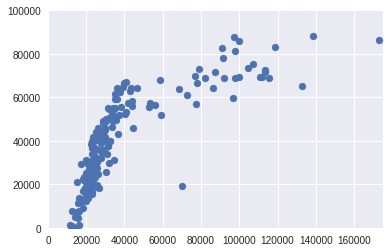

           observed  predicted
observed   1.000000   0.781912
predicted  0.781912   1.000000


In [23]:
plt.scatter(x=ex2.IncomePerCapita, y=lm1.predict())
plt.axis([0,175000,0,100000])
plt.show()
incomes = {'observed':ex2.IncomePerCapita, 'predicted':lm1.predict()}
Incomes = pd.DataFrame.from_dict(incomes)
print(Incomes.corr())

(e)<br>
The graph and correlation table above show that there is a strong (though far from perfect) correlation between actual and predicted incomes, using our model.

## EX 3, Polynomial fit (40+30pt -- 4+5+3$\times$4+5+3$\times$3+5+30)

### Try to fit y with a polynomial $$\hat y(x,w) = \sum\limits_{i=1}^M w_i\cdot x^i$$ with the given dataset 'H33.csv'

### Tasks:
* (a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes $x^1$.)
* (b) Create new columns in data frame to contain the information of $x^2, x^3, x^4$
* (c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
    * For each model, store your fitted parameters as well as your $R^2$
* (d) Report the $R^2$, plot it and observe how it changes
* (e) Create a figure with four (4) subfigures, one for each polynomial degree M = 1, 2, 3, 4. In each subfigure:
    * (e.1) Draw the original scatter plot of x1 and y
    * (e.2) Plot the curve of true function $f(x) = 9x^2 - x + 1$
    * (e.3) Plot your fitted curve of degree M, observe how our model fits the data as M increases
* (f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients $\hat w$
### Extra credit
* (g) In each subfigure:
    * (g.1) Pick an x value (at your discretion) $x_0$, then locate the y value both on your fitted curve and on our function curve ($f(x_0)$)
    * (g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error"
    * (g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten random different future points and predict their values, compare your prediction with the true value), then:
        * Compute the average sum of squares of errors $E = \frac{\sum_i^n (y_i - f(x_i))^2}{n}$ ($x_i$ denotes your future points), mention it in your subfigure's title (**Be sure to use the SAME future points for ALL 4 models when you calculate prediction error**)
        * Which model has the smallest average error $E$? Does this fitted polynomial coincides with the M you picked in part f?

In [12]:
ex3 = pd.read_csv('H33.csv')
ex3

,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22
5,1.773240,0.40


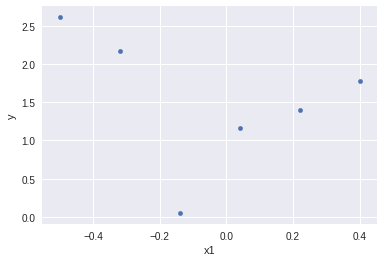

In [13]:
ex3.plot(kind='scatter', x='x1',y='y')

(a) This seems to be an absolute value function, with y[2] being the only value really out of place. That's my best guess anyways, and I guess we'll see as more values get added...

In [14]:
ex3['x2'] = ex3.x1 ** 2
ex3['x3'] = ex3.x1 ** 3
ex3['x4'] = ex3.x1 ** 4
print('(b)')
ex3

(b)


,y,x1,x2,x3,x4
0,2.613388,-0.50,0.2500,-0.125000,0.062500
1,2.170351,-0.32,0.1024,-0.032768,0.010486
2,0.049546,-0.14,0.0196,-0.002744,0.000384
3,1.158258,0.04,0.0016,0.000064,0.000003
4,1.397567,0.22,0.0484,0.010648,0.002343
5,1.773240,0.40,0.1600,0.064000,0.025600


In [15]:
lm_x1 = smf.ols('y ~ x1',data=ex3).fit()
lm_x2 = smf.ols('y ~ x2',data=ex3).fit()
lm_x3 = smf.ols('y ~ x3',data=ex3).fit()
lm_x4 = smf.ols('y ~ x4',data=ex3).fit()

models = [lm_x1, lm_x2, lm_x3, lm_x4]
model_names = ['lm_x1','lm_x2', 'lm_x3', 'lm_x4']
intercept = []
slope = []
r_squared = []

for mod in models:
    intercept.append(mod.params[0])
    slope.append(mod.params[1])
    r_squared.append(mod.rsquared)
    
Params = {'models':model_names,
          'intercept':intercept,
          'slope':slope,
          'r_squared':r_squared}
Params = pd.DataFrame.from_dict(Params)
Params = Params[['models', 'intercept', 'slope', 'r_squared']]
print('(c)')
print(Params)

(c)
  models  intercept      slope  r_squared
0  lm_x1   1.484119  -0.858791   0.104796
1  lm_x2   0.789677   7.601874   0.649677
2  lm_x3   1.426492  -7.032617   0.244027
3  lm_x4   1.071264  26.992720   0.541640


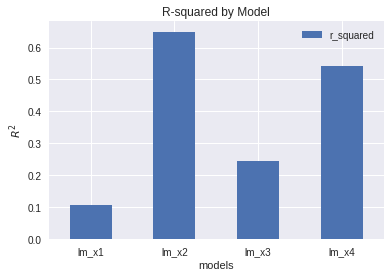

In [16]:
ax = Params.plot(kind='bar',y='r_squared', x='models',rot=0)
ax.set_ylabel('$R^2$')
ax.set_title('R-squared by Model')
plt.show()

(d)<br>
As we see in the graph above (and by looking at the dataframe; it's pretty small!), our r_squared makes a large jump when we initially square the values of x, however, it quickly sinks back down, only to spike up again (though not as high) when we raise it to the fourth power. This seems to indicate that a proper fit would most resemble an exponential to an even power (giving a 'U' shape), and probably not a particularly steep one. 

(e)


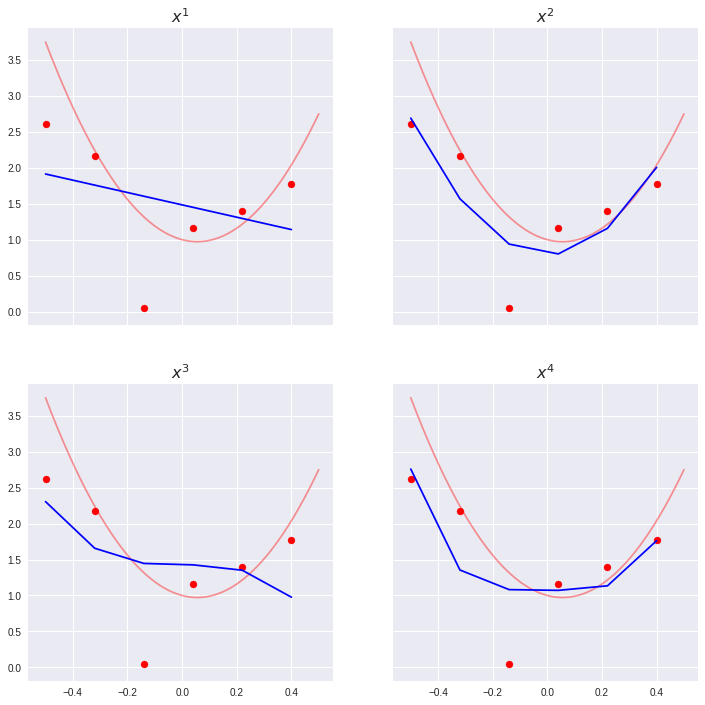

In [17]:
print('(e)')
fig, ax = plt.subplots(2,2, sharey=True, sharex=True, figsize=(12,12))

x = linspace(-0.5,0.5,1000)
y = 9 * x**2 - x + 1

x_pred = np.array(ex3['x1'])
y_pred1=lm_x1.predict()
y_pred2=lm_x2.predict()
y_pred3=lm_x3.predict()
y_pred4=lm_x4.predict()

ax[0, 0].plot(x,y,color='red', alpha=0.4)
ax[0, 0].scatter(x=ex3['x1'],y=ex3['y'], color='red')
ax[0, 0].plot(x_pred, y_pred1, color='b')
ax[0, 0].set_title('$x^1$', fontsize=16)

ax[0, 1].plot(x,y,color='red', alpha=0.4)
ax[0, 1].scatter(x=ex3['x1'],y=ex3['y'], color='red')
ax[0, 1].plot(x_pred, y_pred2, color='b')
ax[0, 1].set_title('$x^2$', fontsize=16)

ax[1, 0].plot(x,y,color='red', alpha=0.4)
ax[1, 0].scatter(x=ex3['x1'],y=ex3['y'], color='red')
ax[1, 0].plot(x_pred, y_pred3, color='b')
ax[1, 0].set_title('$x^3$', fontsize=16)

ax[1, 1].plot(x,y,color='red', alpha=0.4)
ax[1, 1].scatter(x=ex3['x1'],y=ex3['y'], color='red')
ax[1, 1].plot(x_pred, y_pred4, color='b')
ax[1, 1].set_title('$x^4$', fontsize=16)

plt.show()

(f)<br>
We can see from these plots that the model with $x^2$ best fits our plots, which is in line with the prediction we made earlier from observing the r_squared values. The intercept for this model is 0.789, and the parameter is 7.602.